In [1]:
import numpy as np
from scipy.stats import norm
import random as rand
import time
rand.seed(time.time())

In [2]:
import csv
raw_data = list()
with open("(Optimization, AICS301)Lecture 07 Example of Backpropagation.csv",'r',encoding='utf-8-sig') as file:
    for line in csv.reader(file):
        raw_data.append(line)

In [3]:
#Function for read file and transform
def data_processing(index):
    data = np.zeros((4,3),dtype=int)
    c_i = 0
    for _i in range(data.shape[0]):
        r_i = 0
        for _j in range(data.shape[1]):
            temp = raw_data[_i+1][index*4 + _j]
            #print("row", r_i + 1, "col", c_i + 1, "val", temp)
            temp = np.array(temp)
            temp = temp.astype(np.float64)
            data[c_i][r_i] = temp
            r_i = r_i + 1
        #print()
        c_i = c_i + 1
    label = int(raw_data[5][index*4 + 3])

    return data, label

In [4]:
#Function for print matrix in fixed format
def print_matrix(ann = None, x = None, y = None):
    print()
    print(ann)
    if y is None:
        if type(x) == "ndarray":
            for _i in range(x.shape[0]):
                print("ndarray")
                pass
        for _i in range(len(x)):
            print(_i+1, x[_i])
    else:
        for _i in range(x.shape[0]):
            print(_i+1, "\n", x[_i], "\nLabel:", y[_i], "\n")

In [5]:
datas = list()
label = list()
for _i in range(64):
    datas.append(data_processing(_i)[0])
    label.append(data_processing(_i)[1])
datas = np.array(datas)
label = np.array(label)

In [6]:
print_matrix("Data & label", datas, label)


Data & label
1 
 [[1 1 1]
 [1 0 1]
 [1 0 1]
 [1 1 1]] 
Label: 0 

2 
 [[0 1 1]
 [1 0 1]
 [1 0 1]
 [1 1 1]] 
Label: 0 

3 
 [[1 1 0]
 [1 0 1]
 [1 0 1]
 [1 1 1]] 
Label: 0 

4 
 [[1 1 1]
 [1 0 1]
 [1 0 1]
 [1 1 0]] 
Label: 0 

5 
 [[1 1 1]
 [1 0 1]
 [1 0 1]
 [0 1 1]] 
Label: 0 

6 
 [[0 0 0]
 [1 1 1]
 [1 0 1]
 [1 1 1]] 
Label: 0 

7 
 [[0 0 0]
 [0 1 1]
 [1 0 1]
 [1 1 1]] 
Label: 0 

8 
 [[0 0 0]
 [1 1 0]
 [1 0 1]
 [1 1 1]] 
Label: 0 

9 
 [[0 0 0]
 [1 1 1]
 [1 0 1]
 [1 1 0]] 
Label: 0 

10 
 [[0 0 0]
 [1 1 1]
 [1 0 1]
 [0 1 1]] 
Label: 0 

11 
 [[1 1 1]
 [1 0 1]
 [1 1 1]
 [0 0 0]] 
Label: 0 

12 
 [[0 1 1]
 [1 0 1]
 [1 1 1]
 [0 0 0]] 
Label: 0 

13 
 [[1 1 0]
 [1 0 1]
 [1 1 1]
 [0 0 0]] 
Label: 0 

14 
 [[1 1 1]
 [1 0 1]
 [1 1 0]
 [0 0 0]] 
Label: 0 

15 
 [[1 1 1]
 [1 0 1]
 [0 1 1]
 [0 0 0]] 
Label: 0 

16 
 [[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 1 1]] 
Label: 0 

17 
 [[1 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 1]] 
Label: 0 

18 
 [[1 1 1]
 [1 0 1]
 [1 0 0]
 [1 1 1]] 
Label: 0 

19 
 [[1 1 1]
 [1 0 1]


In [7]:
n_data = len(datas) #number of data
n_layer = 1 #number of hidden layer
n_node = 3 #number of hidden node
n_out = 2 #number of output layer node
epoch = 50 #number of epoch
learningrate = 0.2 #learning rate

ratio = 0.1
n_test = int(n_data * ratio) #number of test dataset
n_train = n_data - n_test #number of train dataset
TRAIN_INDEX = list()
TEST_INDEX = list()
if n_train == n_data:
            TRAIN_INDEX = range(n_data)
else:
    while len(TRAIN_INDEX) < n_train:
        temp = rand.randint(0, n_data - 1)
        while temp in TRAIN_INDEX:
            temp = rand.randint(0, n_data - 1)
        TRAIN_INDEX.append(temp)
    TRAIN_INDEX.sort()

for _i in range(n_data):
    if _i not in TRAIN_INDEX:
        TEST_INDEX.append(_i)

print("Test dataset index:", TRAIN_INDEX)
print("Test dataset index:", TEST_INDEX)

d_height = datas[0].shape[0]
d_width = datas[0].shape[1]

INIT_FLAG = False
DEBUG = False
CLEAN = True

Test dataset index: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63]
Test dataset index: [8, 14, 33, 36, 38, 56]


In [8]:
def sigmoid(x):
    return round((1 / (1 + np.exp(-x))), 3)

In [9]:
#Compute differential of sigmoid
def d_sigmoid(x):
    return round(x-x**2, 3)

In [10]:
#Compute (data) * (weight) + bias
def accumulate(x:np.array, y:np.array, b):
    sum = 0
    temp = x*y
    sum = temp.sum() + b
    return round(sum, 3)

In [11]:
#Return answer label for class
def answer(x):
    if x == 0:
        return np.array([1, 0])
    else:
        return np.array([0, 1])

In [12]:
class param():
    def __init__(self, learningrate):
        self.lr = learningrate

    def init(self):
        if not CLEAN:
            print("Initialize setting")
        
    #Initialize weight
    def initialize(self, width, height = 1):
        weight = list()
        for _i in range(height):
            temp = list()
            for _j in range(width):
                temp.append(round(norm.ppf(rand.random()), 3))

            temp = np.array(temp)
            temp = temp.astype(np.float64)
            weight.append(temp)
        weight = np.array(weight)
        return weight
    
    #Update weight
    def update(self, width, height = 1, weight=None, backprop=None):
        if INIT_FLAG:#Implementation for set initial weight
            return self.initialize(width, height)
            pass
        else: #Implementation for update weight
            #w_prev - learingrate * backpropagation_hidden_layer
            new_weight = list()
            if DEBUG:
                print_matrix("\nprevious weight", weight)
                print_matrix("\nbackpropagation", backprop)
            for _i in range(height):
                update_temp = list()
                for _j in range(width):
                    update_temp.append(round(float(weight[_i][_j] - self.lr * backprop[_i][_j]), 3))
                new_weight.append(update_temp)
            new_weight = np.array(new_weight)
            return new_weight

In [13]:
class set_node_param:
    def __init__(self, weight_n, bias_n, weight_o, bias_o):
        self._z2 = list()
        self._a2 = list()
        self._da2 = list()
        self._z3 = list()
        self._a3 = list()
        self._da3 = list()
        self._ca3 = list()
        self._d3 = list()
        self._swd3 = list()
        #d2
        
        self._weight_n = weight_n
        self._bias_n = bias_n
        self._weight_o = weight_o
        self._bias_o = bias_o
        
    def z2_gen(self, index):
        z2 = list()
        for _i in range(n_node):
            z2.append(accumulate(datas[index], self._weight_n[_i], self._bias_n[_i]))
        self._z2 = z2.copy()
        if DEBUG:
            print_matrix("\nz2 values", z2)
        return z2
    
    def a2_gen(self):
        a2 = list()
        for _i in range(n_node):
            a2.append(sigmoid(self._z2[_i]))
        a2 = np.array(a2)
        self._a2 = a2.copy()
        if DEBUG:
            print_matrix("\na2 values", self._a2)
        return a2
    
    def da2_gen(self):
        da2 = list()
        for _i in range(n_node):
            da2.append(d_sigmoid(self._a2[_i]))
        da2 = np.array(da2)
        self._da2 = da2.copy()
        if DEBUG:
            print_matrix("\ndifferential of a2 values", self._da2)
        return da2
    
    def z3_gen(self):
        z3 = list()
        for _i in range(n_out):
            z3.append(accumulate(self._weight_o[_i], self._a2, self._bias_o[_i]))
        z3 = np.array(z3)
        self._z3 = z3.copy()
        if DEBUG:
            print_matrix("\nz3 values", self._z3)
        return z3
        
    def a3_gen(self):
        a3 = list()
        for _i in range(n_out):
            a3.append(sigmoid(self._z3[_i]))
        a3 = np.array(a3)
        self._a3 = a3.copy()
        if DEBUG:
            print_matrix("\na3 values", self._a3)
        return a3
    
    def da3_gen(self):
        da3 = list()
        for _i in range(n_out):
            da3.append(d_sigmoid(self._a3[_i]))
        da3 = np.array(da3)
        self._da3 = da3.copy()
        if DEBUG:
            print_matrix("\ndifferential of a3 values", self._da3)
        return da3
    
    def ca3_gen(self, index):
        ca3 = list()
        ans = answer(label[index])
        for _i in range(len(ans)):
            ca3.append(round(self._a3[_i] - ans[_i], 3))
        ca3 = np.array(ca3)
        self._ca3 = ca3.copy()
        if DEBUG:
            print_matrix("\n∂C/∂a3 values", self._ca3)
        return ca3

    def d3_gen(self):
        d3 = list()
        for _i in range(len(self._ca3)):
            d3.append(round(self._da3[_i]*self._ca3[_i], 3))
        d3 = np.array(d3)
        self._d3 = d3.copy()
        if DEBUG:
            print_matrix("\nδ3 values", self._d3)
        return d3
    
    def swd3_gen(self):
        swd3 = np.dot(self._d3,self._weight_o)
        for _i in range(len(swd3)):
            swd3[_i] = round(swd3[_i], 3)
        self._swd3 = swd3.copy()
        if DEBUG:
            print_matrix("\nΣwδ3 values",self._swd3)
        return swd3

    def d2_gen(self):
        d2 = self._da2 * self._swd3
        for _i in range(len(d2)):
            d2[_i] = round(d2[_i], 3)
        self._d2 = d2.copy()
        if DEBUG:
            print_matrix("\nδ2 values", self._d2)
        return d2
    
    #Compute cost for each data
    def cost(self, cl, index):
        res = 0
        ans = answer(cl[index])
        for _i in range(n_out):
            res = res + (ans[_i] - self._a3[_i])**2
        cost = round(res/2, 3)
        if DEBUG:
            print("\ncost", cost)
        return cost

In [14]:
#function for calculate parameters for each data and save all
def node_calc(node_weight, node_bias, output_weight, output_bias, index = None):
    z2s = list()
    a2s = list()
    da2s = list()
    z3s = list()
    a3s = list()
    da3s = list()
    ca3s = list()
    d3s = list()
    swd3s = list()
    d2s = list()
    costs = list()

    node = set_node_param(node_weight, node_bias, output_weight, output_bias)
    if index is None:
        for _i in range(n_data):
            if DEBUG:
                print()
                print("Data #%d"%(_i+1))
            z2s.append(node.z2_gen(_i))
            a2s.append(node.a2_gen())
            da2s.append(node.da2_gen())
            z3s.append(node.z3_gen())
            a3s.append(node.a3_gen())
            da3s.append(node.da3_gen())
            ca3s.append(node.ca3_gen(_i))
            d3s.append(node.d3_gen())
            swd3s.append(node.swd3_gen())
            d2s.append(node.d2_gen())
            costs.append(node.cost(label, _i))
        return (z2s, a2s, da2s, z3s, a3s, da3s, ca3s, d3s, swd3s, d2s, np.array(costs).sum())
    elif type(index) == list:
        if not CLEAN:
            print(index)
        for _i in index:
            if DEBUG:
                print("Data #%d"%(_i+1))
            z2s.append(node.z2_gen(_i))
            a2s.append(node.a2_gen())
            da2s.append(node.da2_gen())
            z3s.append(node.z3_gen())
            a3s.append(node.a3_gen())
            da3s.append(node.da3_gen())
            ca3s.append(node.ca3_gen(_i))
            d3s.append(node.d3_gen())
            swd3s.append(node.swd3_gen())
            d2s.append(node.d2_gen())
            costs.append(node.cost(label, _i))
        return (z2s, a2s, da2s, z3s, a3s, da3s, ca3s, d3s, swd3s, d2s, np.array(costs).sum())
    else:
        z2 = node.z2_gen(index)
        a2 = node.a2_gen()
        da2 = node.da2_gen()
        z3 = node.z3_gen()
        a3 = node.a3_gen()
        da3 = node.da3_gen()
        ca3 = node.ca3_gen(index)
        d3 = node.d3_gen()
        swd3 = node.swd3_gen()
        d2 = node.d2_gen() 
        cost = node.cost(label, index)
        return (z2, a2, da2, z3, a3, da3, ca3, d3, swd3, d2, cost)

In [15]:
def forward(prev_l=None, back_prop=None):
    set_param = param(learningrate=learningrate)
    global INIT_FLAG
    if prev_l is None and back_prop is None:
        set_param.init()
        INIT_FLAG = True
        if not CLEAN:
            print("Initialize node weight")
            print("Initialize node bias")
            print("Initialize output weight")
            print("Initialize output bias")
        node_weight = list()
        for _i in range(n_node):
            node_weight.append(set_param.update(d_width, d_height, prev_l, back_prop))
        node_bias = set_param.update(n_node, weight=prev_l, backprop=back_prop)[0]
        out_weight = set_param.update(n_node, n_out, prev_l, back_prop)
        out_bias = set_param.update(n_out, weight=prev_l, backprop=back_prop)[0]
    else:
        if not CLEAN:
            print("Updating node weight")
            print("Updating node bias")
            print("Updating output weight")
            print("Updating output bias")
        node_weight = list()
        for _i in range(n_node):
            node_weight.append(set_param.update(d_width, d_height, prev_l[0][_i], back_prop[0][_i]))
        node_bias = set_param.update(n_node, weight=prev_l[1][np.newaxis], backprop=back_prop[1][np.newaxis])[0]
        out_weight = set_param.update(n_node, n_out, prev_l[2], back_prop[2])
        out_bias = set_param.update(n_out, weight=prev_l[3][np.newaxis], backprop=back_prop[3][np.newaxis])[0]
        
    
    INIT_FLAG = False
    if not CLEAN:
        print_matrix("node weight values", node_weight)
        print_matrix("node bias values", node_bias)
        print_matrix("output weight values", out_weight)
        print_matrix("output bias values", out_bias)
    return (node_calc(node_weight, node_bias, out_weight, out_bias, TRAIN_INDEX), node_weight, node_bias, out_weight, out_bias)

In [16]:
class backpropagation():
    def node_weight(self, data, d2, index):
        back_node_w = list()
        for _index in range(len(index)):
            weight = list()
            for _i in range(n_node):
                weight.append(data[index[_index]] * d2[_index][_i])
            weight = np.array(weight)
            back_node_w.append(weight)
            if DEBUG:
                print_matrix("backpropagation for #%d data" %(_index+1), weight)
        return back_node_w
    
    def node_bias(self, d2):
        back_node_b = d2.copy()
        return back_node_b
    
    def output_weight(self, a2, d3, index):
        back_out_w = list()
        for _index in range(len(index)):
            _d3 = d3[_index]
            _a2 = a2[_index]
            weight = np.dot(np.transpose(_d3[np.newaxis]), _a2[np.newaxis])
            weight = np.array(weight)
            for _i in range(weight.shape[0]):
                for _j in range(weight.shape[1]):
                    weight[_i][_j] = round(weight[_i][_j], 3)
            back_out_w.append(weight)
            if DEBUG:
                print_matrix("backpropagation output layer weight for #%d data" %(_index+1),weight)
        return back_out_w
    
    def output_bias(self, d3):
        back_out_b = d3.copy()
        return back_out_b

    def sum_layer(self, x):
        sum = 0
        for _i in x:
            sum = sum + _i
        if np.array(x).ndim == 2:
            for _i in range(len(sum)):
                sum[_i] = round(sum[_i], 3)
        return sum

In [17]:
def backward(a2, d2, d3, index):
    back = backpropagation()
    back_n_w = back.node_weight(datas, d2, index)
    back_n_b = back.node_bias(d2)
    back_o_w = back.output_weight(a2, d3, index)
    back_o_b = back.output_bias(d3)

    sum_back_n_w = back.sum_layer(back_n_w)
    sum_back_n_b = back.sum_layer(back_n_b)
    sum_back_o_w = back.sum_layer(back_o_w)
    sum_back_o_b = back.sum_layer(back_o_b)
    if DEBUG:
        print_matrix("∂CT/∂w values", sum_back_n_w)
        print_matrix("∂CT/∂b values", sum_back_n_b)
        print_matrix("output ∂CT/∂w values", sum_back_o_w)
        print_matrix("output ∂CT/∂b values", sum_back_o_b)

    return (sum_back_n_w, sum_back_n_b, sum_back_o_w, sum_back_o_b)    

In [18]:
def verify(forw_n_w, forw_n_b, forw_o_w, forw_o_b, index):
    r_cnt = 0
    w_cnt = 0
    
    for _index in index:
        z2, a2, da2, z3, a3, da3, ca3, d3, swd3, d2, cost = node_calc(forw_n_w, forw_n_b, forw_o_w, forw_o_b, _index)
        if not CLEAN:
            print_matrix("Data #%d\nPredict output"%(_index + 1),a3)
        if a3[0] > a3[1]:
            predict = 0
            if not CLEAN:
                print("Predict: 0")
        else:
            predict = 1
            if not CLEAN:
                print("Predict: 1")
        if not CLEAN:
            print("Label: ",label[_index])
        if predict == label[_index]:
            if not CLEAN:
                print("Right")
            r_cnt = r_cnt+1
        else:
            if not CLEAN:
                print("Wrong")
            w_cnt = w_cnt+1
        cost = round(cost, 3)
    accuracy = round(r_cnt/(r_cnt+w_cnt), 3)
    if index == TEST_INDEX:
        print("Cost: %.3f" %(cost))
    print("Accuracy: %.3f\n\n"%(accuracy))

    return accuracy, cost

In [19]:
def network():
    costs = list()
    accs = list()
    prev = None
    backprop = None
    for _i in range(epoch):
        print("#%d epoch"%(_i+1))
        (z2, a2, da2, z3, a3, da3, ca3, d3, swd3, d2, cost), forw_n_w, forw_n_b, forw_o_w, forw_o_b = forward(prev, backprop)
        costs.append(round(cost, 3))        
        back_n_w, back_n_b, back_o_w, back_o_b = backward(a2, d2, d3, TRAIN_INDEX)
        prev = (forw_n_w, forw_n_b, forw_o_w, forw_o_b)
        backprop = (back_n_w, back_n_b, back_o_w, back_o_b)
        if not CLEAN:
            print()
        print("Cost: %.3f" %(cost))
        acc = verify(forw_n_w, forw_n_b, forw_o_w, forw_o_b, TRAIN_INDEX)[0]
        accs.append(acc)
    return (z2, a2, da2, z3, a3, da3, ca3, d3, swd3, d2, costs, forw_n_w, forw_n_b, forw_o_w, forw_o_b, accs)

In [20]:
def test(forw_n_w, forw_n_b, forw_o_w, forw_o_b):
    accs = list()
    for _i in range(epoch):
        acc = verify(forw_n_w, forw_n_b, forw_o_w, forw_o_b, TEST_INDEX)[0]
        accs.append(acc)
    return accs

In [21]:
def learning():
    z2, a2, da2, z3, a3, da3, ca3, d3, swd3, d2, train_costs, forw_n_w, forw_n_b, forw_o_w, forw_o_b, train_accs = network()
    print_matrix("Hidden layer weight",forw_n_w)
    print_matrix("Hidden layer bias", forw_n_b)
    print_matrix("Output layer weight", forw_o_w)
    print_matrix("Output layer bias", forw_o_b)
    print("\nFinal Cost:", train_costs[epoch-1])
    print("\nTest")
    test_accs = test(forw_n_w, forw_n_b, forw_o_w, forw_o_b)
    return (train_accs, train_costs, test_accs)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
def graph(train_accs, train_costs, test_accs):
    x = range(epoch)
    y = [train_accs, train_costs, test_accs]
    y[1] = preprocessing.normalize(np.array(y[1])[np.newaxis])
    y[1] = y[1][0]
    labels = ["Trian accuarcy", "Train cost", "Test accuracy"]
    fig = plt.figure()
    fig.set_facecolor('white')
    for _i in range(len(labels)):
        sns.lineplot(x=x, y=y[_i], label=labels[_i])
        plt.legend()

#1 epoch
Cost: 19.197
Accuracy: 0.517


#2 epoch
Cost: 15.375
Accuracy: 0.517


#3 epoch
Cost: 14.665
Accuracy: 0.552


#4 epoch
Cost: 14.067
Accuracy: 0.552


#5 epoch
Cost: 13.251
Accuracy: 0.655


#6 epoch
Cost: 12.141
Accuracy: 0.793


#7 epoch
Cost: 10.654
Accuracy: 0.793


#8 epoch
Cost: 9.120
Accuracy: 0.879


#9 epoch
Cost: 7.635
Accuracy: 0.879


#10 epoch
Cost: 6.358
Accuracy: 0.931


#11 epoch
Cost: 5.296
Accuracy: 0.966


#12 epoch
Cost: 4.446
Accuracy: 0.966


#13 epoch
Cost: 3.787
Accuracy: 0.966


#14 epoch
Cost: 3.292
Accuracy: 0.966


#15 epoch
Cost: 2.916
Accuracy: 0.966


#16 epoch
Cost: 2.618
Accuracy: 0.966


#17 epoch
Cost: 2.377
Accuracy: 0.966


#18 epoch
Cost: 2.184
Accuracy: 0.966


#19 epoch
Cost: 2.022
Accuracy: 0.966


#20 epoch
Cost: 1.878
Accuracy: 0.966


#21 epoch
Cost: 1.757
Accuracy: 0.983


#22 epoch
Cost: 1.649
Accuracy: 0.983


#23 epoch
Cost: 1.551
Accuracy: 0.983


#24 epoch
Cost: 1.465
Accuracy: 0.983


#25 epoch
Cost: 1.390
Accuracy: 0.983


#2

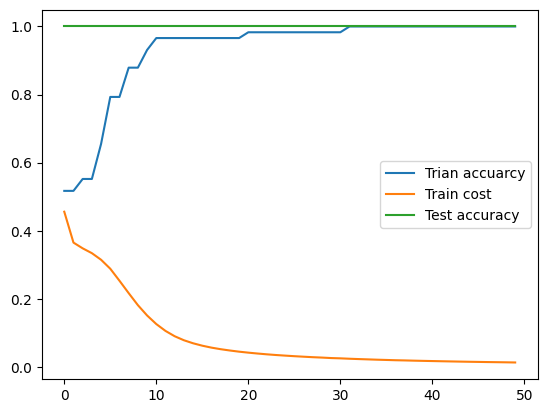

In [24]:
train_accs, train_costs, test_accs = learning()
graph(train_accs, train_costs, test_accs)